In [ ]:
%ls

'서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv'   sample_data/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
metro_all = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')

In [ ]:
metro_all = metro_all.drop(columns = ['작업일자'])

In [ ]:
metro_all.head()

In [ ]:
metro_all.info()

In [ ]:
sorted(list(set(metro_all['사용월'])))

In [ ]:
sorted(list(set(metro_all['지하철역'])))

In [ ]:
sorted(list(set(metro_all['호선명'])))

In [ ]:
len(set(metro_all['지하철역']))

588

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
metro_all.groupby(['호선명']).mean()

In [ ]:
metro_st = metro_all.groupby(['호선명','지하철역']).mean().reset_index()

In [ ]:
metro_st = metro_st.drop(columns=['사용월'])

In [ ]:
metro_get_on = pd.DataFrame()
metro_get_off = pd.DataFrame()

metro_get_on['지하철역'] = metro_st['지하철역']
metro_get_on['호선명'] = metro_st['호선명']
metro_get_off['지하철역'] = metro_st['지하철역']
metro_get_off['호선명'] = metro_st['호선명']

for column in metro_st.columns:
  if '승차' in column:
    metro_get_on[[column]] = metro_st[[column]]
  elif '하차' in column:
    metro_get_off[[column]] = metro_st[[column]]

metro_get_on = metro_get_on.set_index('지하철역')
metro_get_off = metro_get_off.set_index('지하철역')

metro_get_on



,호선명,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,1호선,610.457447,13841.819149,10665.265957,16918.819149,22716.978723,21713.404255,19770.617021,21286.744681,26098.989362,...,30553.319149,21826.691489,17402.670213,16072.914894,13629.819149,6941.680851,727.180851,8.595745,0.159574,0.000000
동묘앞,1호선,116.382979,3077.138298,3557.000000,6560.255319,9132.893617,8528.925532,9742.712766,14141.063830,19588.776596,...,27067.234043,13584.170213,7648.446809,6437.925532,4402.042553,1967.074468,197.319149,2.287234,0.159574,0.159574
서울역,1호선,932.287234,10782.361702,13703.489362,40358.680851,73112.468085,59053.287234,60859.989362,76296.893617,87111.021277,...,214323.734043,122073.063830,86167.223404,89882.946809,65604.031915,29311.574468,3402.042553,39.851064,0.202128,0.010638
시청,1호선,64.180851,2206.393617,3465.095745,7061.712766,9202.180851,11319.946809,14113.244681,19761.329787,22109.595745,...,140159.287234,67399.127660,53302.510638,53652.457447,35340.382979,12421.914894,848.936170,16.914894,0.180851,0.000000
신설동,1호선,274.382979,8481.329787,9649.244681,20108.989362,27721.382979,20431.446809,18732.212766,21492.734043,23130.776596,...,61794.936170,28674.148936,18188.670213,16580.170213,12146.861702,4878.946809,398.265957,2.606383,0.095745,0.010638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
원덕,중앙선,36.404255,320.648936,576.734043,952.361702,1098.691489,1018.446809,970.893617,715.436170,694.957447,...,691.287234,408.074468,219.531915,122.510638,56.819149,23.212766,4.659574,0.042553,0.000000,0.000000
중랑,중앙선,103.861702,5895.457447,9771.574468,23605.340426,23360.106383,14136.563830,10294.457447,9025.287234,9171.053191,...,8087.755319,5603.372340,3985.702128,3489.255319,2526.744681,1187.117021,74.574468,0.021277,0.000000,0.000000
지평,중앙선,0.514286,0.285714,29.771429,291.614286,222.442857,3.800000,289.000000,1.214286,1.542857,...,38.385714,141.542857,11.142857,8.471429,3.485714,0.014286,0.000000,0.000000,0.000000,0.000000


In [ ]:
df = pd.DataFrame(index=metro_st['지하철역'])
df['호선명'] = metro_get_on['호선명']
df['평균승차인원수'] = metro_get_on[metro_get_on.columns.difference(['호선명'])].mean(axis=1)
df['평균하차인원수'] = metro_get_off[metro_get_off.columns.difference(['호선명'])].mean(axis=1)
df['평균승하차인원수'] = df[['평균승차인원수','평균하차인원수']].sum(axis=1)
df.loc['서울역']

,호선명,평균승차인원수,평균하차인원수,평균승하차인원수
지하철역,,,,
서울역,1호선,64239.761525,59827.354610,124067.116135
서울역,4호선,14092.005762,23938.179965,38030.185727
서울역,경부선,5452.975621,1266.652482,6719.628103
서울역,경의선,2775.750940,3376.494674,6152.245614
서울역,공항철도 1호선,12911.730940,11228.834220,24140.565160


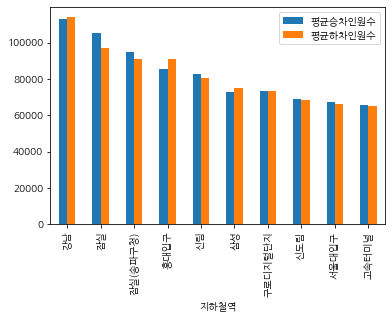

In [ ]:
df.sort_values('평균승하차인원수', ascending=False)[['평균승차인원수','평균하차인원수']].head(10).plot(kind=('bar'))
plt.show()

In [ ]:
# !pip install geopy
from geopy.geocoders import Nominatim

def geocoding(address):
  geolocoder = Nominatim(user_agent='South Korea',  timeout=None)
  geo = geolocoder.geocode(address)
  if geo == None:
    return None
  crd = [str(geo.latitude), str(geo.longitude)]
  return crd

geocoding('구로구청역')

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
metro_line = df[df['호선명']=='1호선']
for i, row in enumerate(metro_line.values):
  name = metro_line.iloc[i].name
  line, avg_on, avg_off, avg_all = row

  if '(' in name:
    name = name.split('(')[0]
  if '역' in name:
    crd = geocoding(name)
  else:
    crd = geocoding(name+'역')
  
  if crd == None:
    print(f'Can not find crd {name}')
    continue
  
  if i == 0:
    map_ = folium.Map(location=crd, zoom_start=12)
  # print(name, ':', avg_all/metro_line['평균승하차인원수'].mean()+2)
  try:
    marker = folium.CircleMarker(
        crd,
        radius=avg_all/metro_line['평균승하차인원수'].mean()+10,
        color='red',
        fill_color='red'
    )
  except Exception as e:
    print(e)
  
  marker.add_to(map_)
map_

In [ ]:
metro_all[metro_all['지하철역']=='노량진']['호선명'].unique()

array(['9호선', '경부선'], dtype=object)

In [ ]:
1+1

2